**Here going to evaluate CNN with different activation functions and optimizers on CIFAR10**

Loading libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading dataset into training set and testing set

In [ ]:
data = datasets.cifar10.load_data()

In [ ]:
(x_train, y_train), (x_test, y_test) = data

Checking shape and size of dataset

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

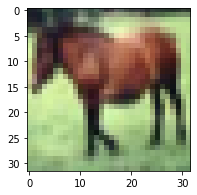

In [ ]:
plt.figure(figsize=(25,3))
plt.imshow(x_train[7])

Normalizing values

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

CNN

The convolution layer inputs with  32 * 32 (w*h) sized images (channel=3 (r,g,b))
Intially a 32 filter is used and Relu is used as activation function over here. The dense layer contains 64 nodes and it is activated with 'relu' function. The final dense layer has 10 nodes and which is activated with 'softmax'.

In [ ]:
model_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),

        #Dense

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')             
])

Optimization with Adam optimizer

Here sparse categorical cross entropy is used for loss calculation. We can utilize categorical cross entropy if we applied 1-hot encoder

In [ ]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fiting the model with training data 

In [ ]:
model_cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4162 - accuracy: 0.4951
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0968 - accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9712 - accuracy: 0.6626
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8815 - accuracy: 0.6942
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8122 - accuracy: 0.7169
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7562 - accuracy: 0.7366
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7051 - accuracy: 0.7555
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6634 - accuracy: 0.7695
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6228 - accuracy: 0.7821
Epoch 10/10
1563/1563 [==============================] - 60s 38m

Model evaluation

In [ ]:
model_cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9322 - accuracy: 0.7014


[0.9321849346160889, 0.7013999819755554]

CNN With filter size 64 & 128

Here, the CNN intial filter size is replaced with 64 and the second filter with 128

In [56]:
model0_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),

        #Dense

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')             
])

Optimization with Adam

In [57]:
model0_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model training

In [58]:
model0_cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4190 - accuracy: 0.4886
Epoch 2/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.0496 - accuracy: 0.6328
Epoch 3/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.9155 - accuracy: 0.6824
Epoch 4/10
1563/1563 [==============================] - 131s 83ms/step - loss: 0.8178 - accuracy: 0.7163
Epoch 5/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.7440 - accuracy: 0.7414
Epoch 6/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.6769 - accuracy: 0.7654
Epoch 7/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.6194 - accuracy: 0.7851
Epoch 8/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.5691 - accuracy: 0.8015
Epoch 9/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.5216 - accuracy: 0.8168
Epoch 10/10
1563/1563 [==============================] 

Model evaluation

In [59]:
model0_cnn.evaluate(x_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.9756 - accuracy: 0.7068


[0.9755603671073914, 0.7067999839782715]

CNN with 4 * 4 max pooling

In [64]:
modelmax_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((4,4)),

        #Dense

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')             
])

Model optimization

In [65]:
modelmax_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [66]:
modelmax_cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5531 - accuracy: 0.4357
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2053 - accuracy: 0.5710
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0764 - accuracy: 0.6222
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9975 - accuracy: 0.6508
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9350 - accuracy: 0.6762
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8855 - accuracy: 0.6924
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8443 - accuracy: 0.7072
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8142 - accuracy: 0.7192
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7824 - accuracy: 0.7293
Epoch 10/10
1563/1563 [==============================] - 56s 36m

Model evaluation

In [67]:
modelmax_cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9063 - accuracy: 0.6939


[0.9062692523002625, 0.6938999891281128]

CNN with Nadam optimizer

In [60]:
modelo_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),

        #Dense

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')             
])

Optimization with Nadam

In [61]:
modelo_cnn.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model tranining

In [62]:
modelo_cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4352 - accuracy: 0.4865
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0687 - accuracy: 0.6250
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9279 - accuracy: 0.6770
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8365 - accuracy: 0.7102
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7628 - accuracy: 0.7345
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7052 - accuracy: 0.7554
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6540 - accuracy: 0.7733
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6106 - accuracy: 0.7878
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.5679 - accuracy: 0.8017
Epoch 10/10
1563/1563 [==============================] - 60s 38m

Model evaluation

In [63]:
modelo_cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9424 - accuracy: 0.7038


[0.9424166083335876, 0.7038000226020813]

CNN with different activation functions

In [ ]:
model1_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='sigmoid'),
        layers.MaxPool2D((2,2)),

        #Dense

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')             
])

Model optimization

In [ ]:
model1_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model training

In [49]:
model1_cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3028 - accuracy: 0.0993
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3028 - accuracy: 0.0998
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3027 - accuracy: 0.1006
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3028 - accuracy: 0.0981
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.3028 - accuracy: 0.0958
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3028 - accuracy: 0.0971
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3028 - accuracy: 0.0973
Epoch 10/10
1563/1563 [==============================] - 59s 38m

Model evaluation

In [50]:
model1_cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026561737060547, 0.10000000149011612]

Type 2

In [51]:
model2_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='softmax'),
        layers.MaxPool2D((2,2)),

        #Dense

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='sigmoid')             
])

In [52]:
model2_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model2_cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.7064 - accuracy: 0.3755
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3833 - accuracy: 0.5036
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2750 - accuracy: 0.5473
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1805 - accuracy: 0.5832
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0991 - accuracy: 0.6134
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0383 - accuracy: 0.6362
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9812 - accuracy: 0.6556
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9344 - accuracy: 0.6724
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8931 - accuracy: 0.6881
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [54]:
model2_cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0174 - accuracy: 0.6479


[1.0173909664154053, 0.6478999853134155]

**Summary**

**Here the CNN alogorithm evaluated with different filter values, activation functions and optimizers. The intial CNN with specified parametres are effective compared to other codes executed over here.**